In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/ardamavi/sign-language-digits-dataset<br>
Digitos em linguagem de sinais da Turkia.
* https://github.com/darkin1/sign-language-digits-ml/blob/master/dataset_fixed.zip

In [2]:
X = np.load('X.npy')
y = np.load('Y.npy')

In [3]:
X.shape, y.shape

((2062, 64, 64), (2062, 10))

In [4]:
y[0: 5], y[2057: 2062]

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))

Para facilitar, vamos transformar o array de resultado em uma classe, pra isso podemos pegar apenas o maior número do array.

In [5]:
y = np.argmax(y, axis=1)

Transformamos os arrays do nosso X em arrays individuais, para poder passar para o estimador.

In [6]:
X = X.reshape(2062, 64*64)

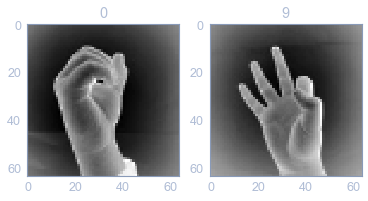

In [7]:
plt.subplots(1, 2)
plt.subplot(121)
plt.imshow(X[0].reshape(64, 64), cmap='gray')
plt.title(y[0])
plt.subplot(122)
plt.imshow(X[2061].reshape(64, 64), cmap='gray')
plt.title(y[2061])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42, test_size=0.33)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.model_selection import cross_val_score

Faremos uma cros validação em cima do dataset base para medir o desempenho.

In [13]:
clf = RandomForestClassifier(max_depth=100, n_estimators=200)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.74285714, 0.75985663, 0.72661871, 0.77372263, 0.75925926])

In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.7606461086637298

Agora, aplicaremos uma tecnica de manipulação, 'Data Augmentation'. Essa técnica permite aumentar a quantidade de dados de treino a partir de dados ja existentes no nosso dataset.

Para este exemplo, aplicaremos deslocamentos nas imagens.

In [15]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((64, 64))
    shifted_image = shift(image, [dy, dx], cval=0, mode='nearest')
    return shifted_image.reshape([-1])

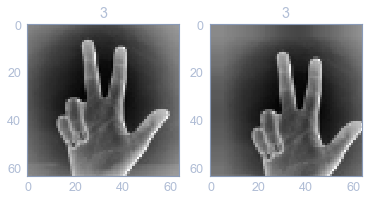

In [16]:
plt.subplots(1, 2)
plt.subplot(121)
plt.imshow(X_train[0].reshape(64, 64), cmap='gray')
plt.title(y_train[0])
plt.subplot(122)
plt.imshow(shift_image(X_train[0], 5, 5).reshape(64, 64), cmap='gray')
plt.title(y_train[0])
plt.show()

Agora que criamos nossa função para deslocar as imagens, aplicaremos a toda nossa base de treino.

In [17]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((5, 0), (-5, 0), (0, 5), (0, -5)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [18]:
X_train_augmented.shape

(6905, 4096)

Agora vamos avaliar o nosso mesmo estimador usando os novos dados de treino.

In [19]:
clf.fit(X_train_augmented, y_train_augmented)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8384728340675477

Aqui mostro uma outra métrica de avaliação de algoritimos de classificação. Com a matrix de confusão, podemos visualizar cada erro cometido por nosso estimador.

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cnf = confusion_matrix(y_pred, y_test)

In [22]:
import seaborn as sns

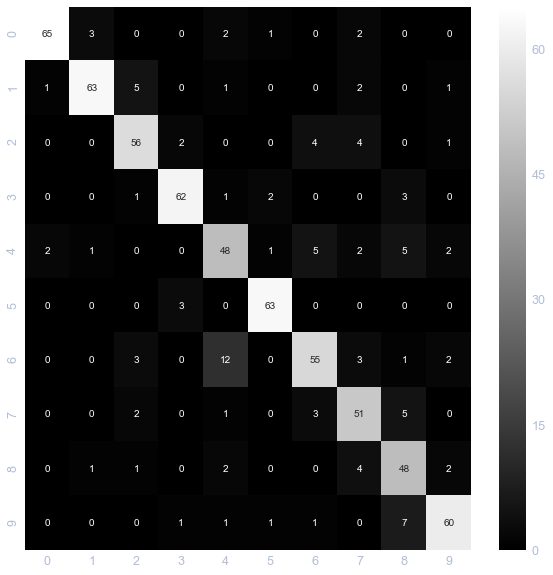

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(cnf, annot=True, cmap='gray');

Outra métrica é o relatório de classificação. Nele podemos ver a acurácia, precisão, recall e f1-score do estimador para cada classe.

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        73
           1       0.93      0.86      0.89        73
           2       0.82      0.84      0.83        67
           3       0.91      0.90      0.91        69
           4       0.71      0.73      0.72        66
           5       0.93      0.95      0.94        66
           6       0.81      0.72      0.76        76
           7       0.75      0.82      0.78        62
           8       0.70      0.83      0.76        58
           9       0.88      0.85      0.86        71

   micro avg       0.84      0.84      0.84       681
   macro avg       0.84      0.84      0.84       681
weighted avg       0.84      0.84      0.84       681



Produzido por: Matheus Xavier